In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
from scipy.stats import norm
import scipy.stats as sps
import cv2
from scipy.ndimage import convolve
import skimage
from scipy import ndimage
from scipy.spatial.distance import cdist
from nibabel.testing import data_path
import nibabel as nib
from sklearn.mixture import GaussianMixture
import os
import pandas as pd
import skimage.measure
import seaborn as sns
import scipy as sp
import gudhi as gd
import random
from function_geometry import * 
from codegeometry import * 
from PIL import Image

/Users/abaach/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [5]:
from gtda.plotting import plot_point_cloud
import matplotlib.pyplot as plt
from gtda.diagrams import PersistenceLandscape, Silhouette, PersistenceEntropy, NumberOfPoints, Amplitude
from sklearn.preprocessing import StandardScaler

In [6]:
def preprocessing_data(path, T):
    U = []
    w = 0 
    for i in os.listdir(path): 
        if w < T: 
            img = path+i
            M = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
            U.append((-1)*M - np.min((-1)*M)) #pour avoir les bonnes valeurs en haut 
        w = w+1
    return U


def Perimetre_Hermine(X,t):
    [M,N] = np.shape(X)
    L_1 = np.sum((X[0:M-1,0:N]>t)*(X[1:M,0:N]<=t))
    L_2 = np.sum((X[0:M,0:N-1]>t)*(X[0:M,1:N]<=t))
    L_3 = np.sum((X[0:M-1,0:N]<=t)*(X[1:M,0:N]>t))
    L_4 = np.sum((X[0:M,0:N-1]<=t)*(X[0:M,1:N]>t))
    L = L_1 + L_2 + L_3 + L_4
    return L

def Area(X, t):
    return np.sum(X>=t)

def Euler(image_binary):
    M,N = np.shape(image_binary)
    u = np.zeros([M+2,M+2])
    u[1:M+1,1:M+1] = image_binary
    M,N = np.shape(u)
    u_c = np.append(u[1:M,1:M],np.zeros((M-1,1)), axis = 1)
    u_cc = np.vstack([u_c,np.zeros((1,np.shape(u_c)[1]))])
    # Matrice S d'Ebner : 
    mtri = u + np.vstack([u[1:M,0:N],np.zeros((1,N))]) + np.append(u[0:M,1:N],np.zeros((M,1)), axis = 1)  + u_cc
    # Configuration en crois : 
    ind = np.where(mtri == 2)
    # Cas ou S(i,j) = 0
    list_l = ind[0]
    list_c = ind[1]
    c_z = list_c[np.where(u[ind]==0)[0]]
    l_z = list_l[np.where(u[ind]==0)[0]]
    # pour le compter il faut que S(i+1,j+1) soit aussi égale à 0
    S_0 = sum(u[l_z + 1, c_z + 1]==0)
    # Cas ou S(i,j) = 1
    l_o = list_l[np.where(u[ind]==1)[0]]
    c_o = list_c[np.where(u[ind]==1)[0]]
    # pour le compter il faut que S(i+1,j+1) = 1 soit aussi égale à 1
    S_1 = sum(u[l_o+1,c_o + 1] == 1) 
    # Calcul de la caractéristique d'Euler 
    E = (1/4)*np.sum(mtri == 1) - (1/4)*np.sum(mtri == 3) - (0.5*S_0 + 0.5*S_1)
    return E

In [7]:
path_train_b = "/Users/abaach/Desktop/CodePersistenceGeometr/archive-2/data/train/benign/"
path_train_m = "/Users/abaach/Desktop/CodePersistenceGeometr/archive-2/data/train/malignant/"
path_test_b = "/Users/abaach/Desktop/CodePersistenceGeometr/archive-2/data/test/benign/"
path_test_m = "/Users/abaach/Desktop/CodePersistenceGeometr/archive-2/data/test/malignant/"

In [9]:
U_train_b = preprocessing_data(path_train_b, 50)
U_train_m = preprocessing_data(path_train_m, 50)
U_test_b = preprocessing_data(path_test_b,50)
U_test_m = preprocessing_data(path_test_m, 50)

In [10]:
labels = [0]*len(U_train_b) + [1]*len(U_train_m) + [0]*len(U_test_b) + [1]*len(U_test_m)


In [11]:
# #diag_train_b = []
# #geo_features_train_b = []
# w = 0
# for U in U_train_b:
#     print(w)
#     L = np.linspace(np.min(U), np.max(U), 50)[::-1]
#     geo, diag = resume_geometrique(U, L)
#     diag_train_b.append(diag)
#     geo_features_train_b.append(geo)
#     w = w+1

In [12]:
# diag_train_m = []
# geo_features_train_m = []
# w = 0
# for U in U_train_m:
#     print(w)
#     L = np.linspace(np.min(U), np.max(U), 50)[::-1]
#     geo, diag = resume_geometrique(U, L)
#     diag_train_m.append(diag)
#     geo_features_train_m.append(geo)
#     w = w+1
    
# diag_test_b = []
# geo_features_test_b = []
# w = 0
# for U in U_test_b:
#     print(w)
#     L = np.linspace(np.min(U), np.max(U), 50)[::-1]
#     geo, diag = resume_geometrique(U, L)
#     diag_test_b.append(diag)
#     geo_features_test_b.append(geo)
#     w = w+1
    
# diag_test_m = []
# geo_features_test_m = []
# w = 0
# for U in U_test_m:
#     print(w)
#     L = np.linspace(np.min(U), np.max(U), 50)[::-1]
#     geo, diag = resume_geometrique(U, L)
#     diag_test_m.append(diag)
#     geo_features_test_m.append(geo)
#     w = w+1

In [13]:
from gtda.diagrams import HeatKernel
from gtda.images import Binarizer
from gtda.images import RadialFiltration
from gtda.homology import CubicalPersistence
from gtda.diagrams import Scaler

In [14]:
#So now that we know how to generate new topological features, let’s combine them using scikit-learn’s utility function for feature unions:

from sklearn.pipeline import make_pipeline, make_union
from gtda.images import HeightFiltration
from gtda.images import RadialFiltration

direction_list = [[1, 0], [1, 1], [0, 1], [-1, 1], [-1, 0], [-1, -1], [0, -1], [1, -1]]

center_list = [
    [13, 6],
    [6, 13],
    [13, 13],
    [20, 13],
    [13, 20],
    [6, 6],
    [6, 20],
    [20, 6],
    [20, 20],
]

# Creating a list of all filtration transformer, we will be applying
filtration_list = (
    [
        HeightFiltration(direction=np.array(direction), n_jobs=-1)
        for direction in direction_list
    ]
    + [RadialFiltration(center=np.array(center), n_jobs=-1) for center in center_list]
)

# Creating the diagram generation pipeline
diagram_steps = [
    [
        Binarizer(threshold=0.4, n_jobs=-1),
        filtration,
        CubicalPersistence(n_jobs=-1),
        Scaler(n_jobs=-1),
    ]
    for filtration in filtration_list
]

# Select a variety of metrics to calculate amplitudes
metric_list = [
    {"metric": metric}
    for metric in ["bottleneck", "wasserstein", "landscape","betti", "heat", "silhouette","persistence_image"]
]

#metric_list_geo = [
 #   {"metric_geo": metric_geo}
  #  for metric_geo in ["U", "L"]
#]

# Concatenate to generate 3 + 3 + (4 x 3) = 18 topological features
feature_union = make_union(
    *[PersistenceEntropy(nan_fill_value=-1)]
    + [Amplitude(**metric, n_jobs=-1) for metric in metric_list]
   # + [resume_geometrique(U,L) for metric_geo in metric_list_geo]
)

tda_union = make_union(
    *[make_pipeline(*diagram_step, feature_union) for diagram_step in diagram_steps],
    n_jobs=-1
)

In [15]:
U_train = np.asarray(U_train_b + U_train_m)
X_train_tda = tda_union.fit_transform(U_train)

In [16]:
U_test = np.asarray(U_test_b + U_test_m)
X_test_tda = tda_union.fit_transform(U_test)

In [17]:
M,N =X_train_tda.shape
n = 50
XX_train_geo = np.zeros((len(U_train), N+3*n + 1))
i = 0
for U in U_train:
    print(i)
    L = np.linspace(np.min(U), np.max(U),  n)[::-1]
    #per = np.zeros(n)
    #area = np.zeros(n)
    #euler = np.zeros(n)
    #for t in range(len(L)):
     #   per[t] = Perimetre_Hermine(U, L[t])
      #  area[t] = Area(U, L[t])
       # euler[t] = Euler(U >= L[t])
    life, barecode, persistence, connected_comp, Per_total, Area_total, euler_total, per, area, euler = function_persistance(U, L, False)
    XX_train_geo[i][:N] = X_train_tda[i]
    XX_train_geo[i][N:N+n] = Area_total
    XX_train_geo[i][N+n:N+2*n] = Per_total - (4/224)*Area_total
    XX_train_geo[i][N+2*n:-1] = euler_total - (4/(2*np.pi*224))*Per_total + ((1/(2*np.pi))*(4/224)**2 - 1/224)*Area_total
    diagram_pondere = np.zeros((1, len(life), 3))
    k = 0
    for idx in life.keys():
        diagram_pondere[0][k][0] = np.linalg.norm(per[idx])*life[idx][1]
        diagram_pondere[0][k][1] = np.linalg.norm(per[idx])*life[idx][0]
        diagram_pondere[0][k][2] = 0
        k=k+1
    persistence_entropy = PersistenceEntropy(normalize=True)
    diagram_pondere = [i for i in diagram_pondere if str(i) != 'nan']
# Calculate topological feature matrix
    XX_train_geo[i][-1] = persistence_entropy.fit_transform(diagram_pondere)
    i=i+1
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [32]:
M,N =X_test_tda.shape
n = 50
XX_test_geo = np.zeros((len(U_test), N+3*n + 1))
i = 0
for U in U_test:
    print(i)
    L = np.linspace(np.min(U), np.max(U),  n)[::-1]
    #per = np.zeros(n)
    #area = np.zeros(n)
    #euler = np.zeros(n)
    #for t in range(len(L)):
     #   per[t] = Perimetre_Hermine(U, L[t])
      #  area[t] = Area(U, L[t])
       # euler[t] = Euler(U >= L[t])
    life, barecode, persistence, connected_comp, Per_total, Area_total, euler_total, per, area, euler = function_persistance(U, L, False)
    XX_test_geo[i][:N] = X_train_tda[i]
    XX_test_geo[i][N:N+n] = Area_total
    XX_test_geo[i][N+n:N+2*n] = Per_total - (4/224)*Area_total
    XX_test_geo[i][N+2*n:-1] = euler_total - (4/(2*np.pi*224))*Per_total + ((1/(2*np.pi))*(4/224)**2 - 1/224)*Area_total
    diagram_pondere = np.zeros((1, len(life), 3))
    k = 0
    for idx in life.keys():
        diagram_pondere[0][k][0] = np.linalg.norm(per[idx])*life[idx][1]
        diagram_pondere[0][k][1] = np.linalg.norm(per[idx])*life[idx][0]
        diagram_pondere[0][k][2] = 0
        k=k+1
    persistence_entropy = PersistenceEntropy(normalize=True)
    diagram_pondere = [i for i in diagram_pondere if str(i) != 'nan']
# Calculate topological feature matrix
    XX_test_geo[i][-1] = persistence_entropy.fit_transform(diagram_pondere)
    i=i+1
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [19]:
# M,N =X_test_tda.shape
# XX_test_geo = np.zeros((len(U_test), N+3*n))
# i = 0
# for U in U_test:
#     L = np.linspace(np.min(U), np.max(U), n)
#     per = np.zeros(n)
#     area = np.zeros(n)
#     euler = np.zeros(n)
#     for t in range(len(L)):
#         per[t] = Perimetre_Hermine(U, L[t])
#         area[t] = Area(U, L[t])
#         euler[t] = Euler(U >= L[t])
#     XX_test_geo[i][:N] = X_test_tda[i]
#     XX_test_geo[i][N:N+n] = area
#     XX_test_geo[i][N+n:N+2*n] = per - (4/224)*area
#     XX_test_geo[i][N+2*n:] = euler - (4/(2*np.pi*224))*per + ((1/(2*np.pi))*(4/224)**2 - 1/224)*area
#     i=i+1
    

In [33]:
T = len(U_train)
y_train = labels[:T]
y_test = labels[T:]

In [34]:
XX_test_geo.shape, XX_train_geo.shape

((100, 423), (100, 423))

In [35]:
from sklearn.ensemble import RandomForestClassifier
XX_train_geo = StandardScaler().fit_transform(XX_train_geo)
rf = RandomForestClassifier()
rf.fit(XX_train_geo, y_train)
XX_test_geo = StandardScaler().fit_transform(XX_test_geo)
#X_test_tda = tda_union.transform(U_test)
rf.score(XX_test_geo, y_test)

0.81

In [44]:
from sklearn.ensemble import RandomForestClassifier


X_train_tda = StandardScaler().fit_transform(X_train_tda)
rf = RandomForestClassifier()
rf.fit(X_train_tda, y_train)
X_test_tda = StandardScaler().fit_transform(X_test_tda)
#X_test_tda = tda_union.transform(U_test)
rf.score(X_test_tda, y_test)


0.58

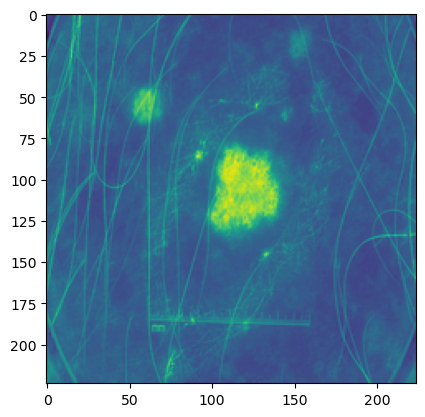

In [477]:
m = 599
U = U_train[m]
plt.imshow(U)

wp 2 level 160.36363636363637
connected_components 1


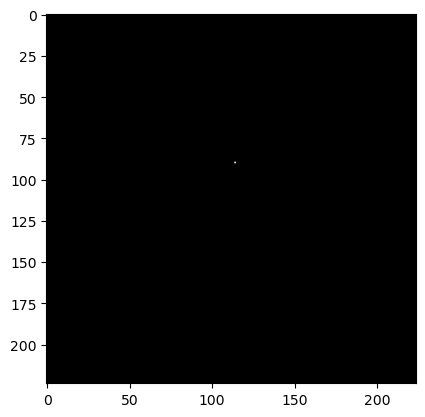

wp 3 level 158.72727272727275
connected_components 1


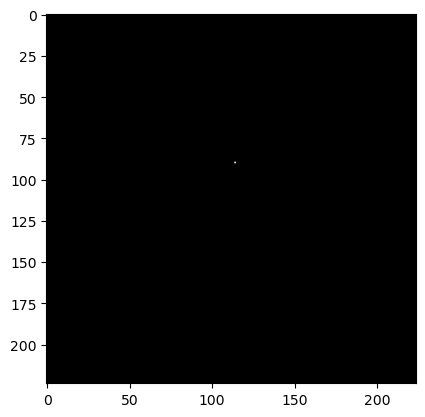

wp 4 level 157.0909090909091
connected_components 1


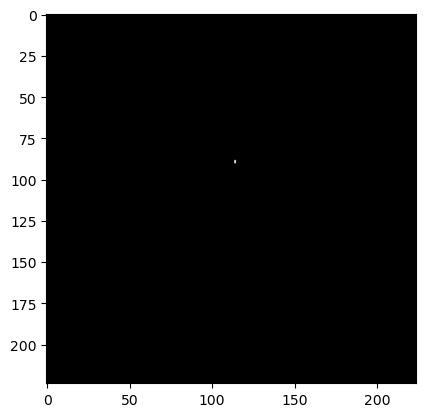

wp 5 level 155.45454545454547
connected_components 4


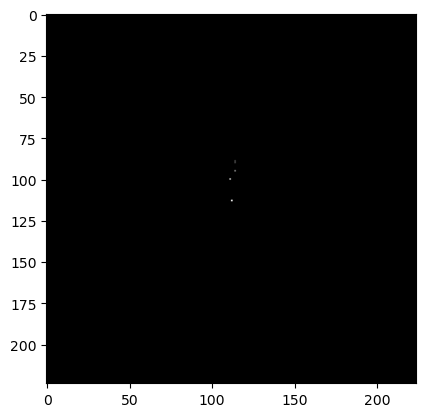

wp 6 level 153.81818181818184
connected_components 7


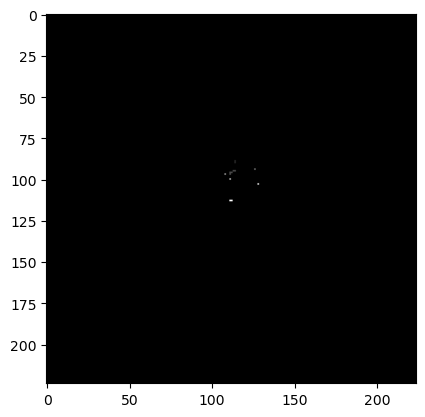

wp 7 level 152.1818181818182
connected_components 8


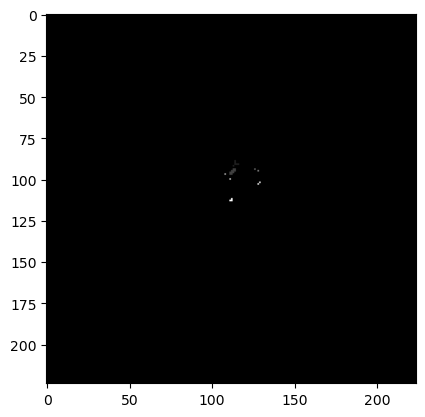

wp 8 level 150.54545454545456
connected_components 11


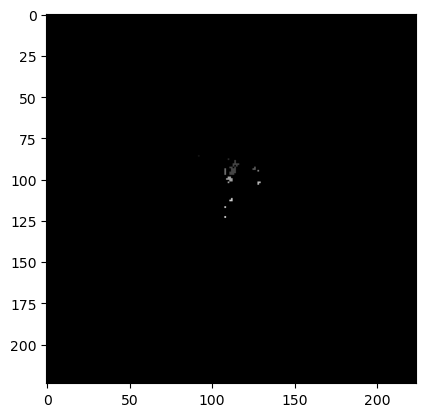

wp 9 level 148.9090909090909
connected_components 16


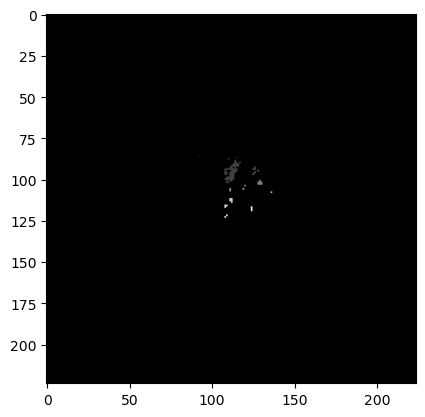

wp 10 level 147.27272727272728
connected_components 17


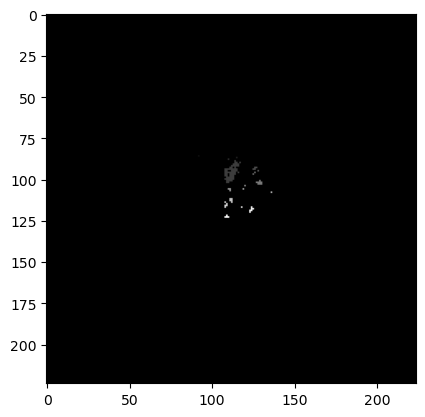

wp 11 level 145.63636363636365
connected_components 22


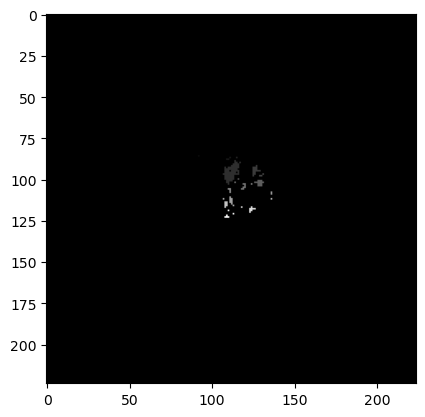

wp 12 level 144.0
connected_components 22


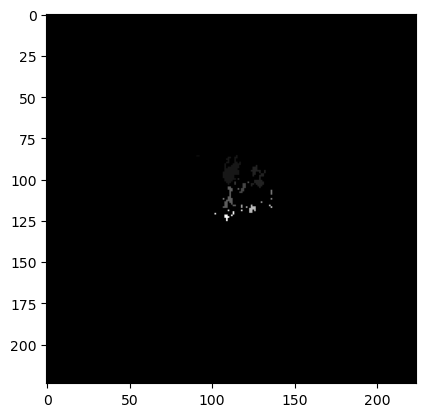

wp 13 level 142.36363636363637
connected_components 17


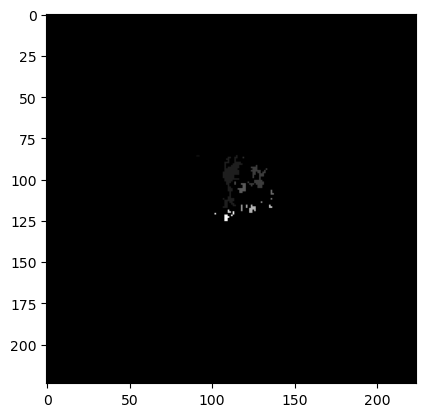

wp 14 level 140.72727272727275
connected_components 18


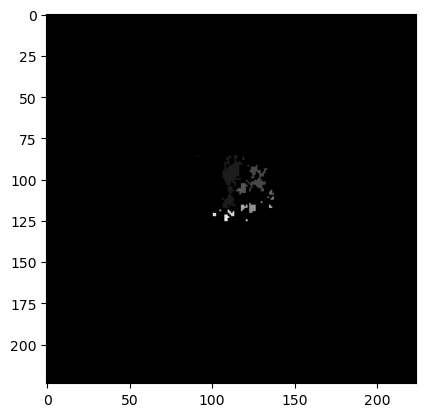

wp 15 level 139.0909090909091
connected_components 18


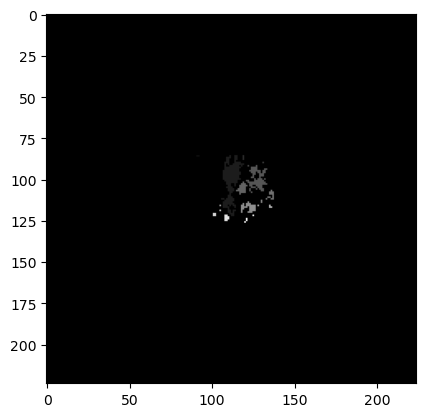

wp 16 level 137.45454545454547
connected_components 10


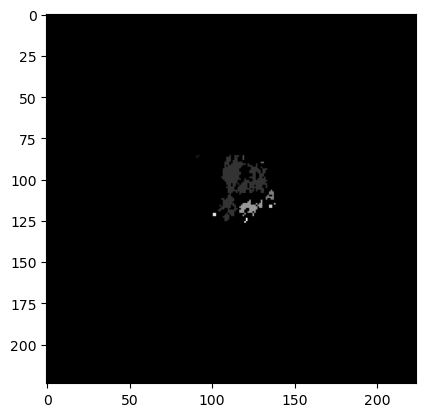

wp 17 level 135.8181818181818
connected_components 12


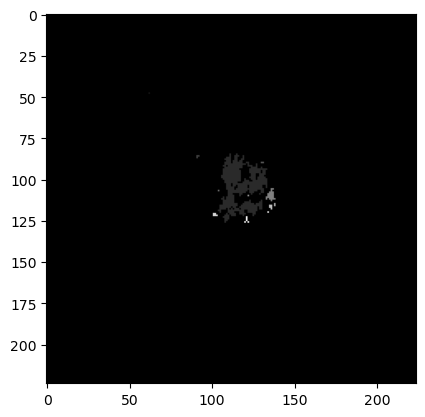

wp 18 level 134.1818181818182
connected_components 14


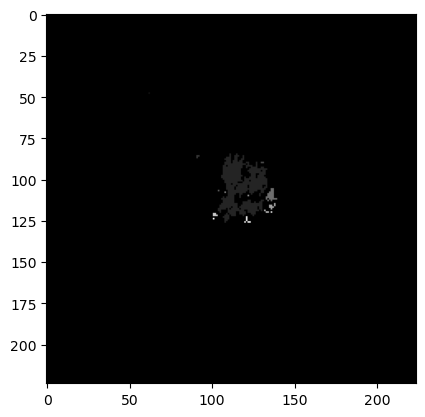

wp 19 level 132.54545454545456
connected_components 10


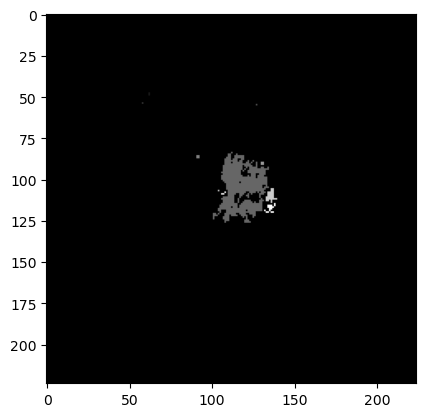

wp 20 level 130.9090909090909
connected_components 10


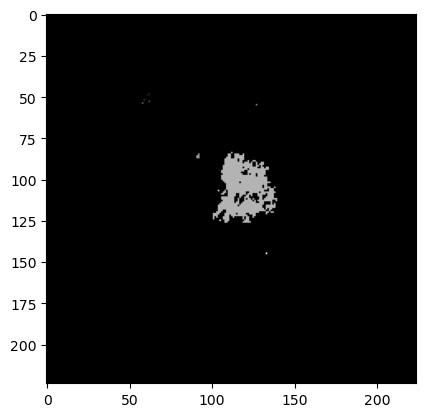

wp 21 level 129.27272727272728
connected_components 10


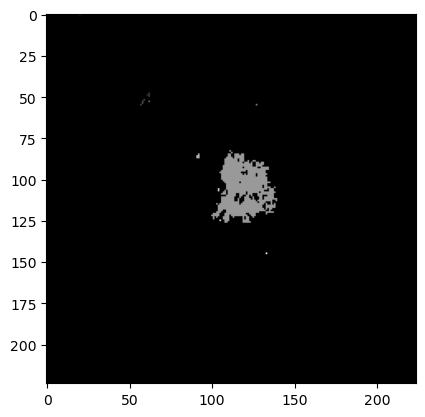

wp 22 level 127.63636363636364
connected_components 12


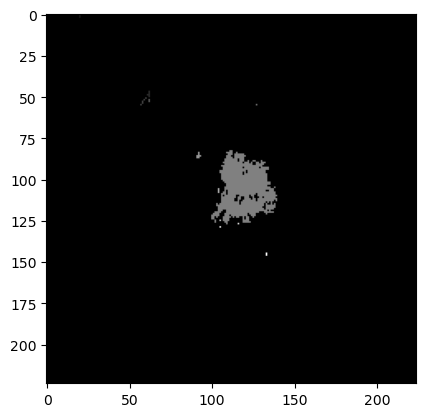

wp 23 level 126.00000000000001
connected_components 12


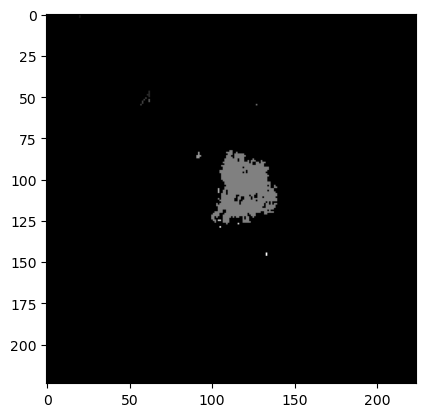

wp 24 level 124.36363636363637
connected_components 10


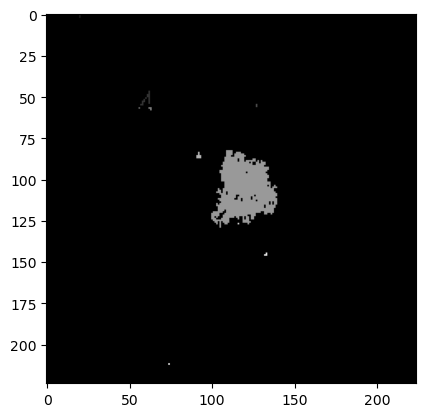

wp 25 level 122.72727272727273
connected_components 13


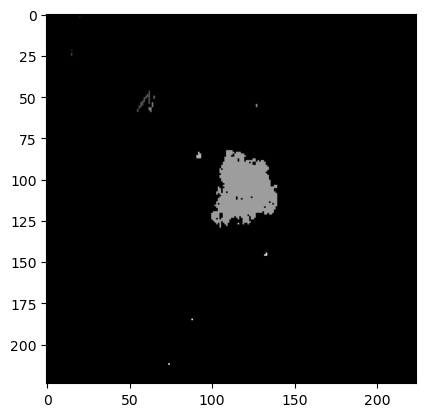

wp 26 level 121.0909090909091
connected_components 12


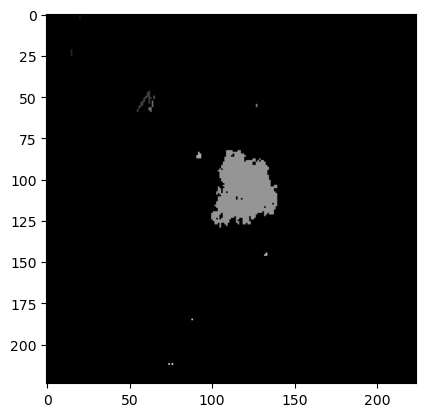

wp 27 level 119.45454545454547
connected_components 12


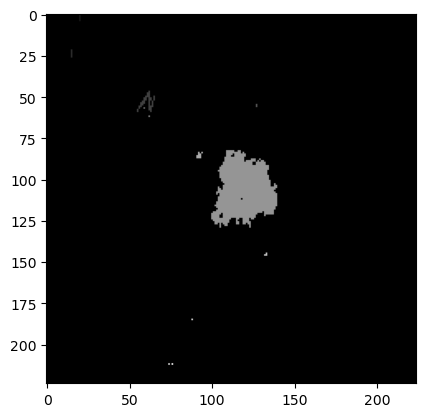

wp 28 level 117.81818181818183
connected_components 12


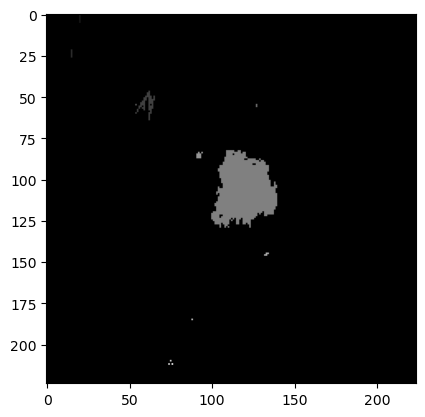

wp 29 level 116.18181818181819
connected_components 13


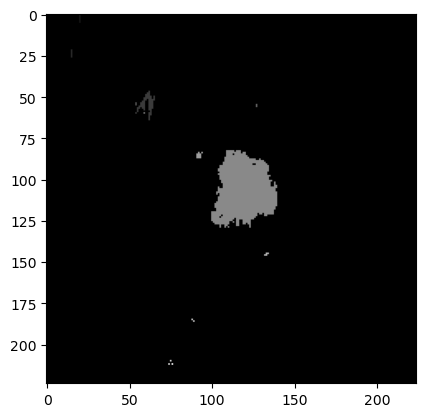

wp 30 level 114.54545454545455
connected_components 13


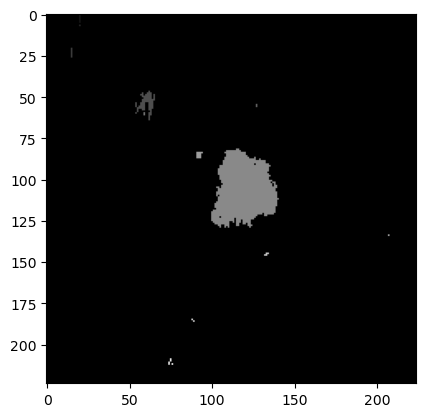

wp 31 level 112.90909090909092
connected_components 17


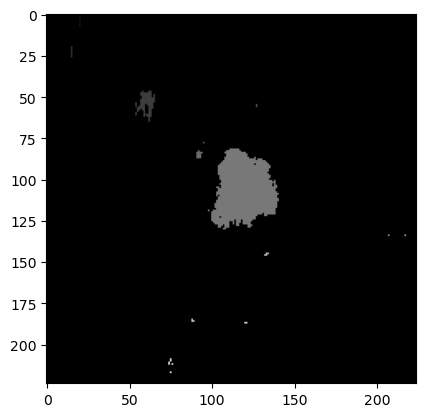

wp 32 level 111.27272727272728
connected_components 20


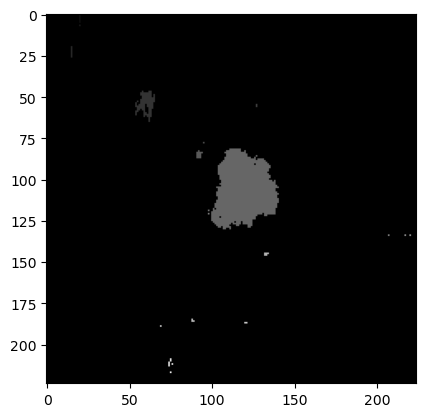

wp 33 level 109.63636363636364
connected_components 25


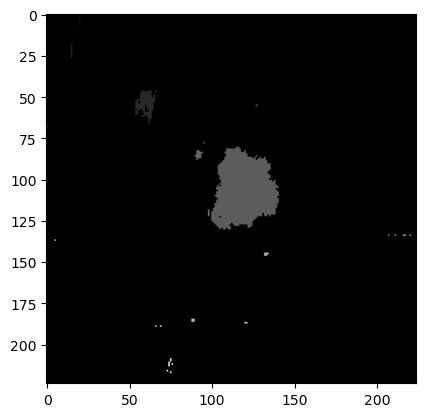

wp 34 level 108.0
connected_components 25


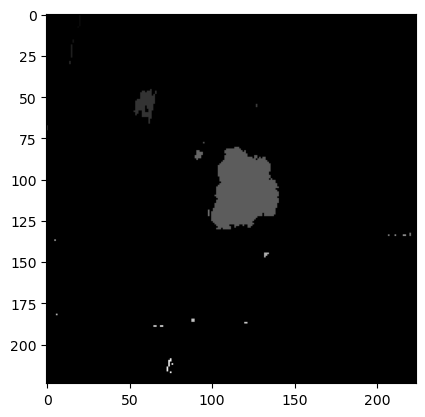

wp 35 level 106.36363636363637
connected_components 25


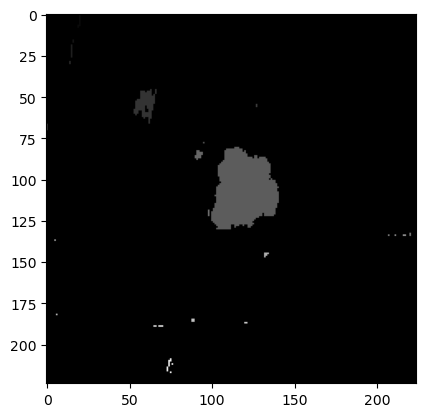

wp 36 level 104.72727272727273
connected_components 26


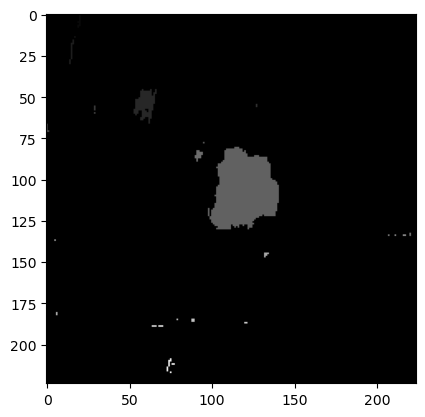

wp 37 level 103.0909090909091
connected_components 27


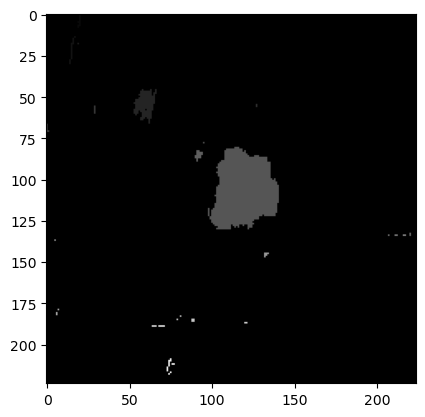

wp 38 level 101.45454545454547
connected_components 36


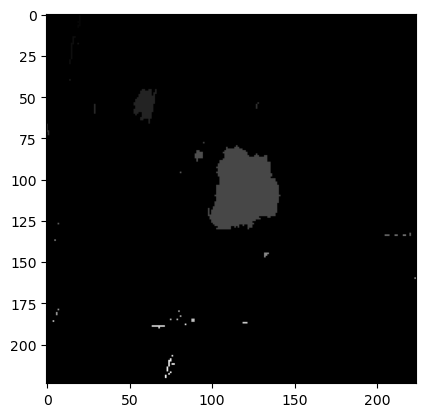

wp 39 level 99.81818181818183
connected_components 45


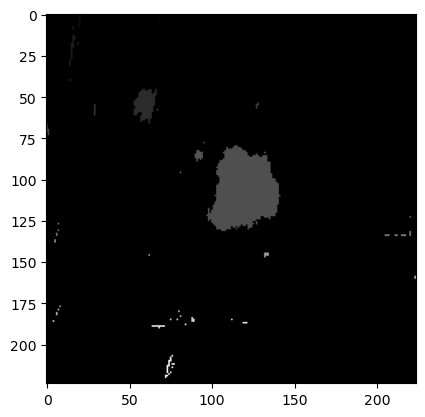

wp 40 level 98.18181818181819
connected_components 49


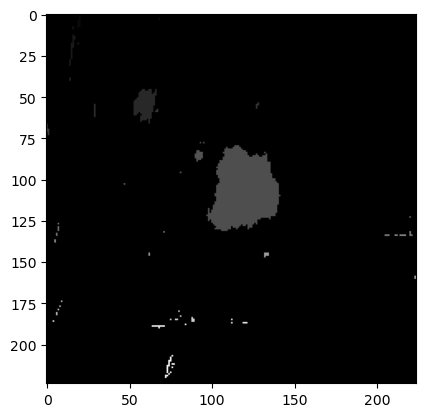

wp 41 level 96.54545454545455
connected_components 67


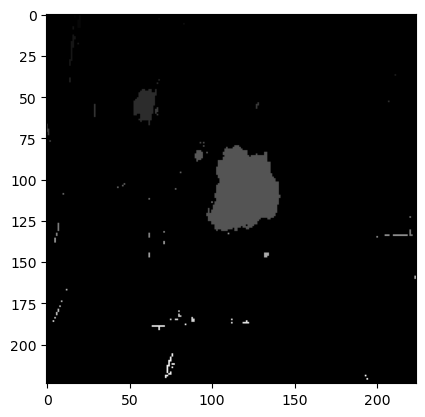

wp 42 level 94.90909090909092
connected_components 73


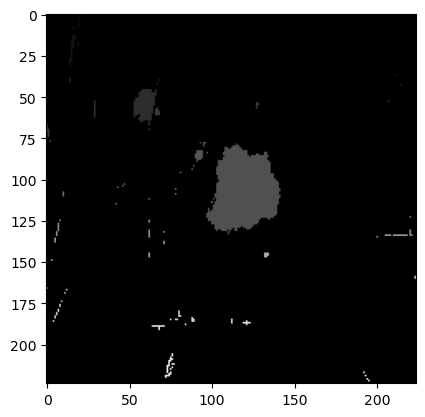

wp 43 level 93.27272727272728
connected_components 79


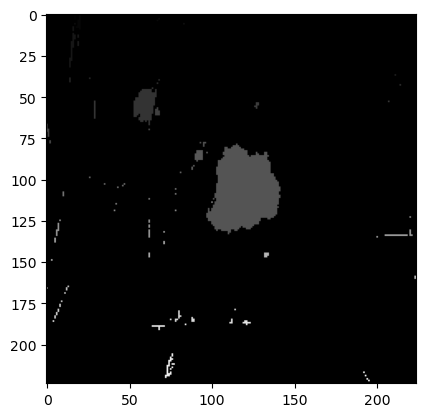

wp 44 level 91.63636363636364
connected_components 89


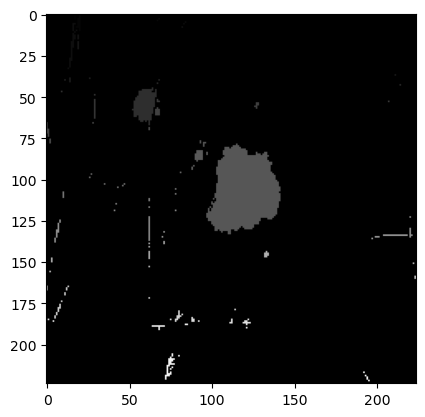

wp 45 level 90.0
connected_components 104


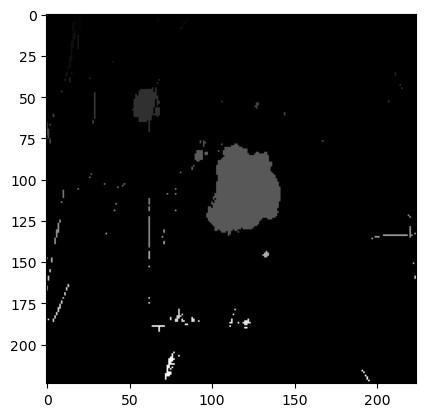

wp 46 level 88.36363636363637
connected_components 114


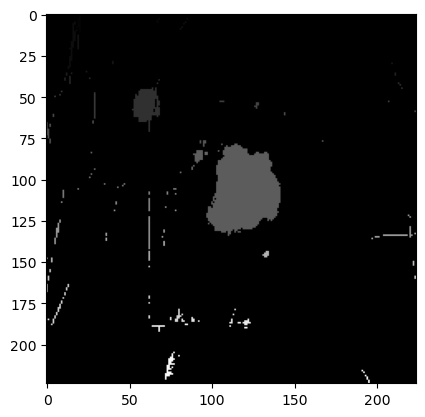

wp 47 level 86.72727272727273
connected_components 121


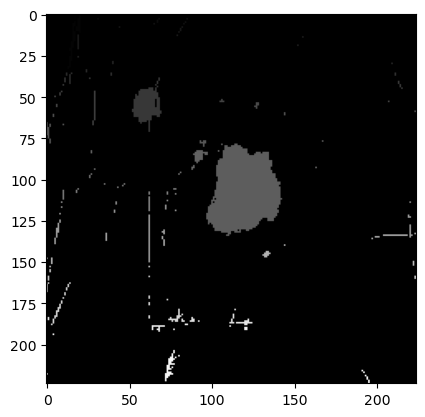

wp 48 level 85.0909090909091
connected_components 132


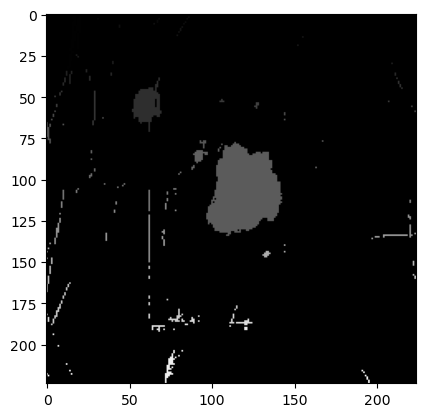

wp 49 level 83.45454545454545
connected_components 151


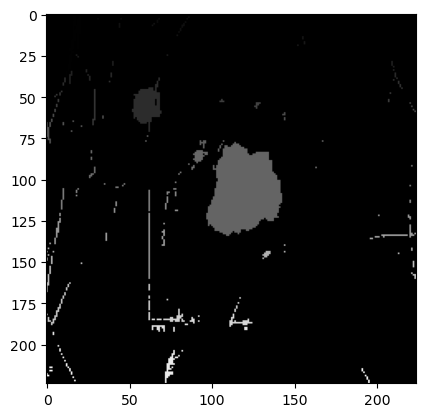

wp 50 level 81.81818181818183
connected_components 165


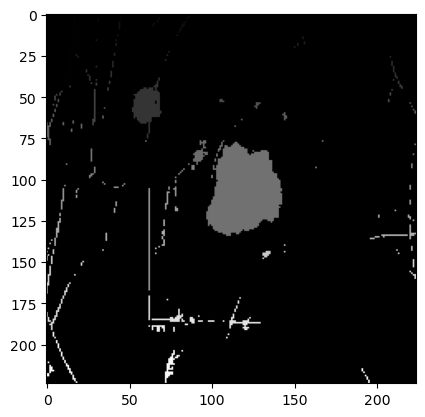

wp 51 level 80.18181818181819
connected_components 161


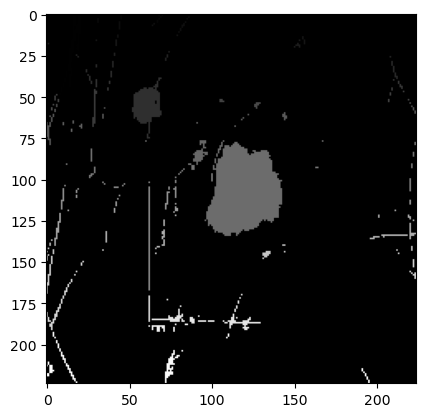

wp 52 level 78.54545454545455
connected_components 171


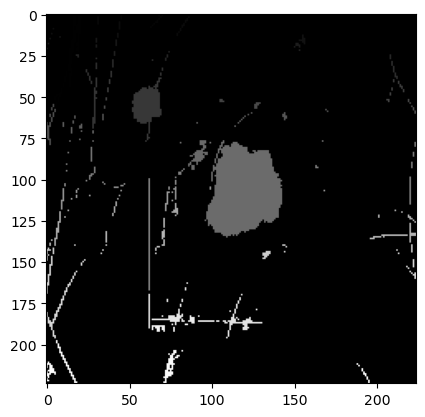

wp 53 level 76.90909090909092
connected_components 185


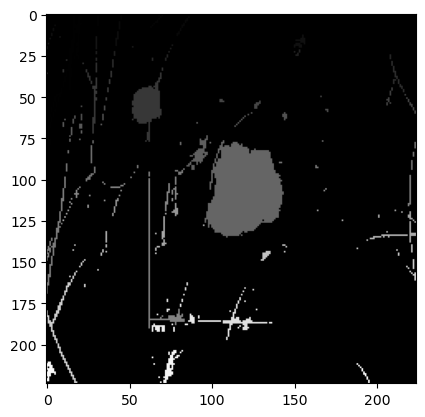

wp 54 level 75.27272727272728
connected_components 187


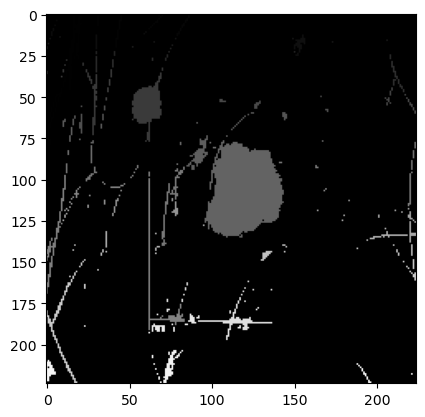

wp 55 level 73.63636363636364
connected_components 218


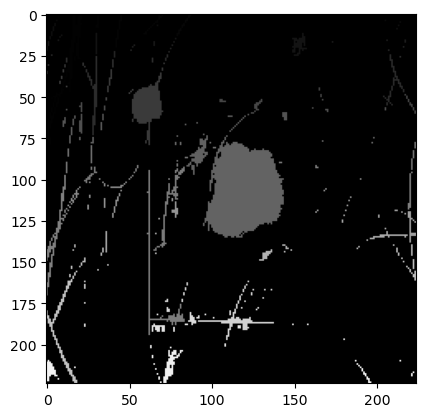

wp 56 level 72.0
connected_components 224


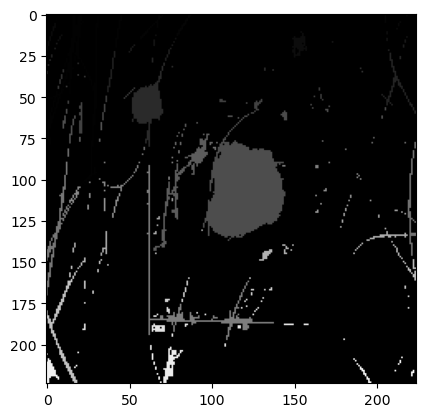

wp 57 level 70.36363636363637
connected_components 223


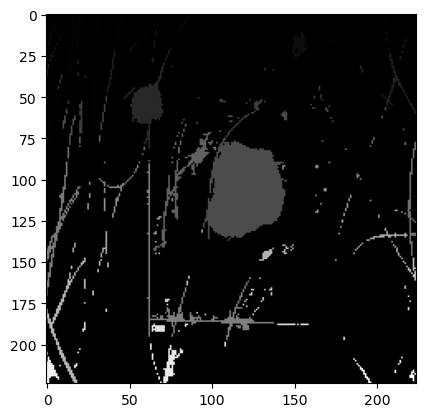

wp 58 level 68.72727272727273
connected_components 245


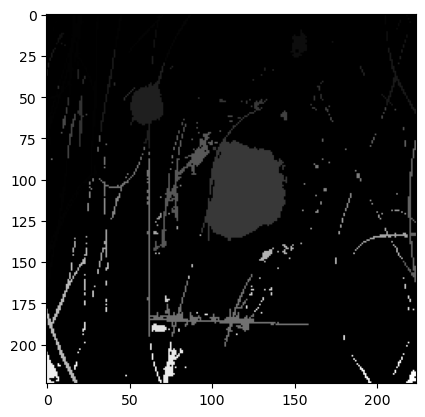

wp 59 level 67.0909090909091
connected_components 269


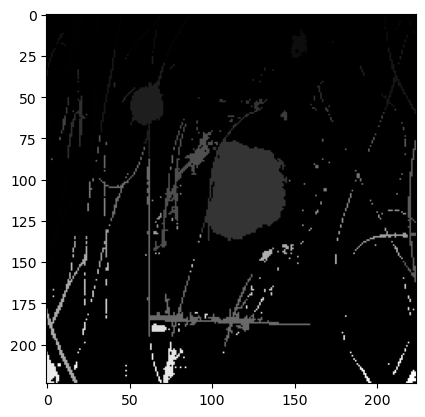

wp 60 level 65.45454545454545
connected_components 250


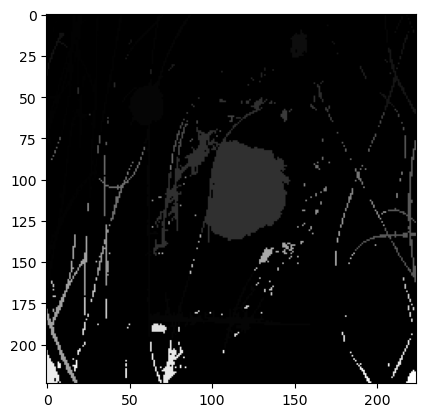

wp 61 level 63.81818181818182
connected_components 257


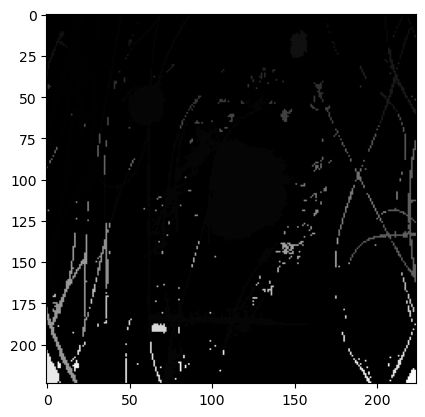

wp 62 level 62.18181818181819
connected_components 275


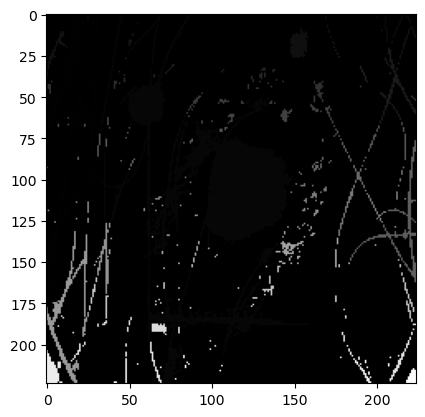

wp 63 level 60.54545454545455
connected_components 272


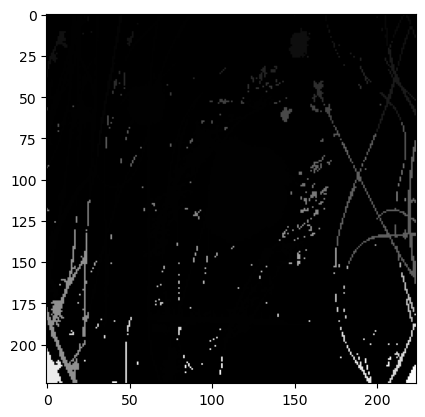

wp 64 level 58.909090909090914
connected_components 254


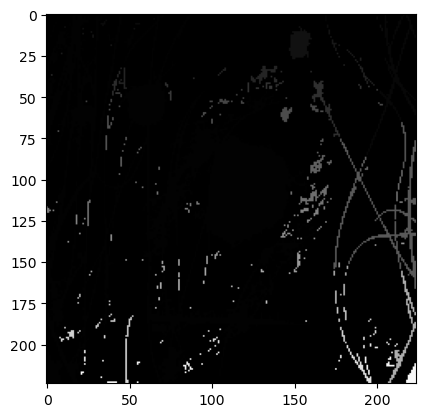

wp 65 level 57.27272727272727
connected_components 225


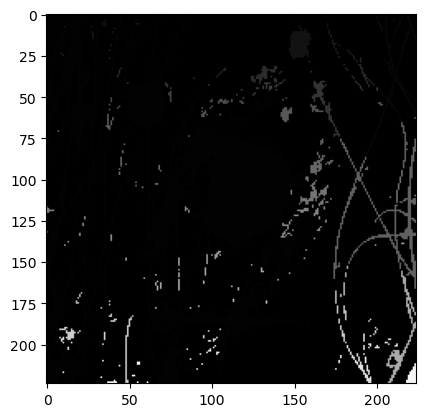

wp 66 level 55.63636363636364
connected_components 198


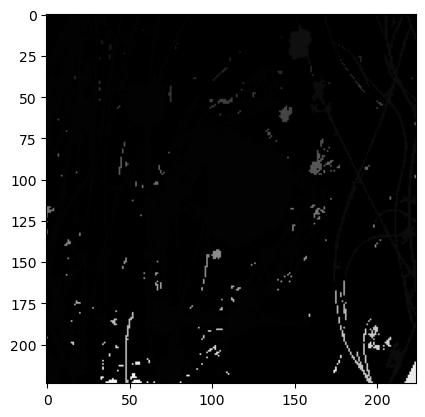

wp 67 level 54.0
connected_components 182


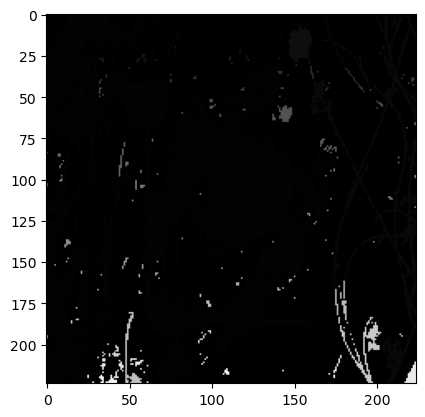

wp 68 level 52.36363636363637
connected_components 168


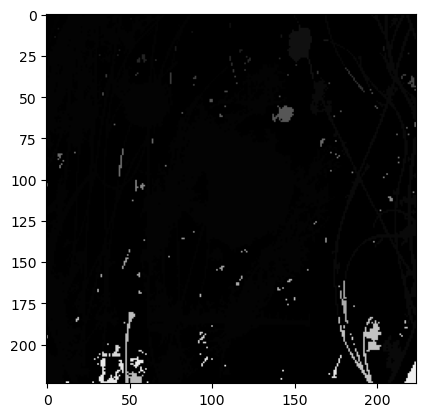

wp 69 level 50.727272727272734
connected_components 165


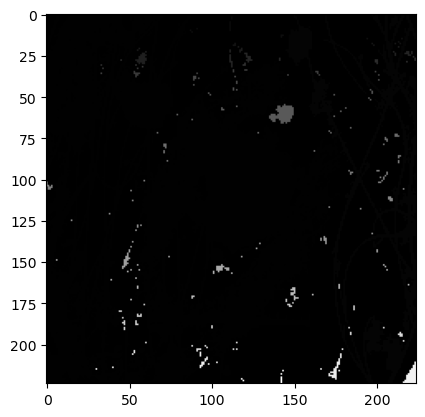

wp 70 level 49.09090909090909
connected_components 139


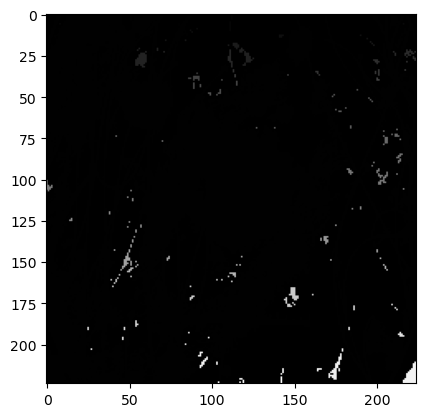

wp 71 level 47.45454545454546
connected_components 110


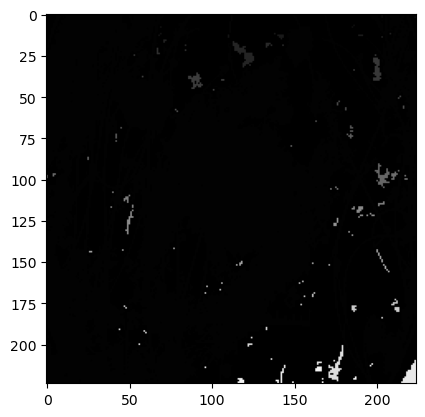

wp 72 level 45.81818181818182
connected_components 89


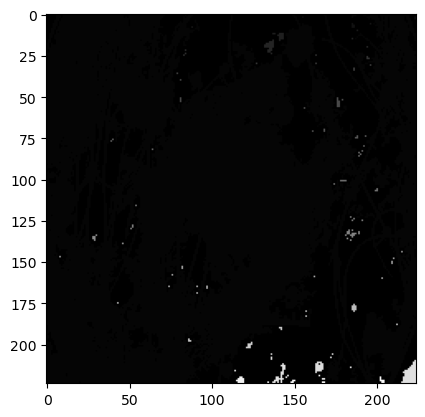

wp 73 level 44.18181818181819
connected_components 76


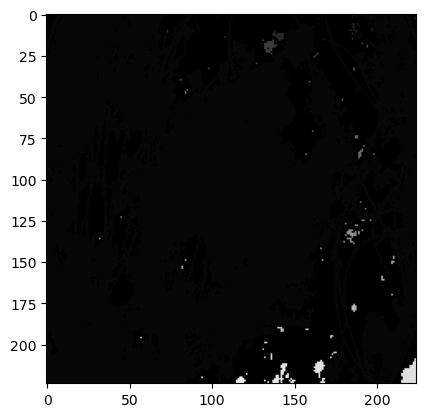

wp 74 level 42.54545454545455
connected_components 79


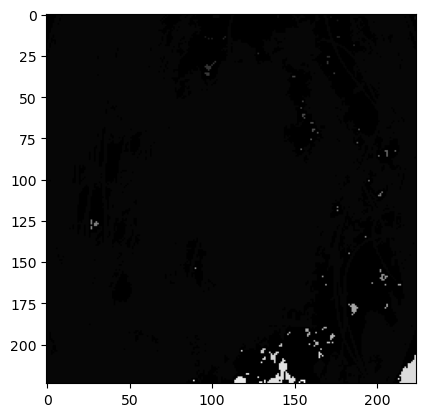

wp 75 level 40.909090909090914
connected_components 59


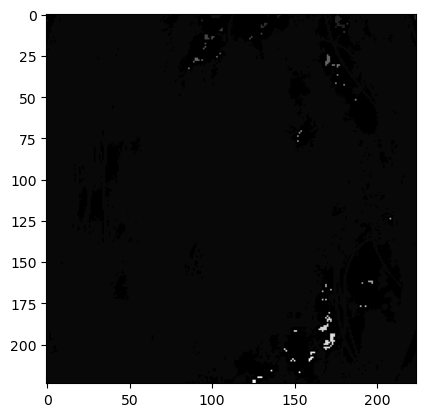

wp 76 level 39.27272727272727
connected_components 49


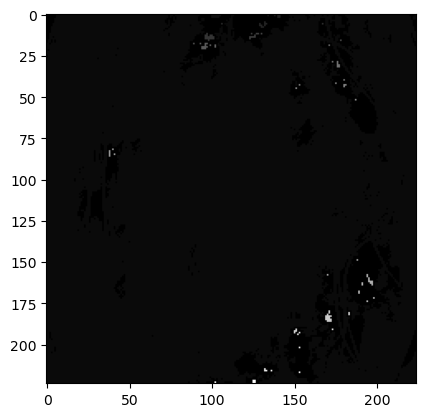

wp 77 level 37.63636363636364
connected_components 17


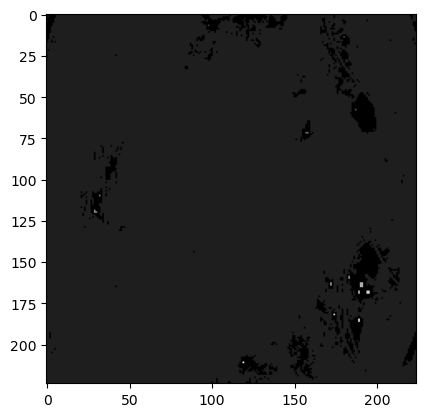

wp 78 level 36.0
connected_components 8


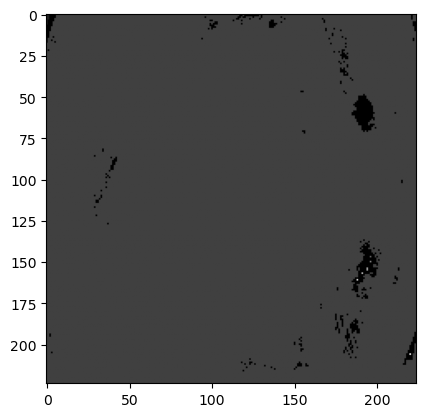

wp 79 level 34.36363636363637
connected_components 6


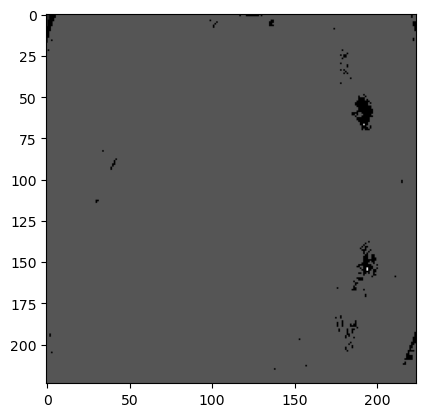

wp 80 level 32.72727272727273
connected_components 2


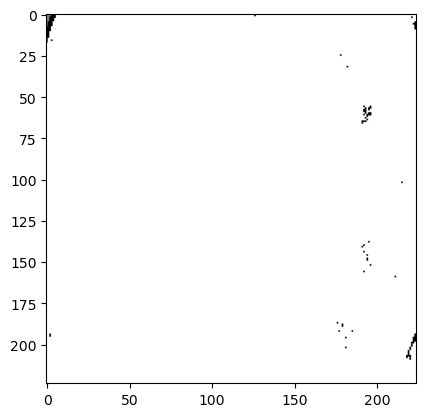

wp 81 level 31.090909090909093
connected_components 2


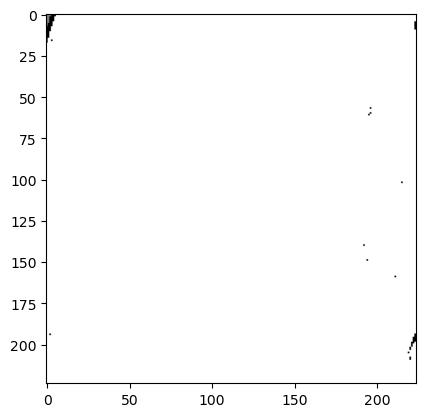

wp 82 level 29.454545454545457
connected_components 2


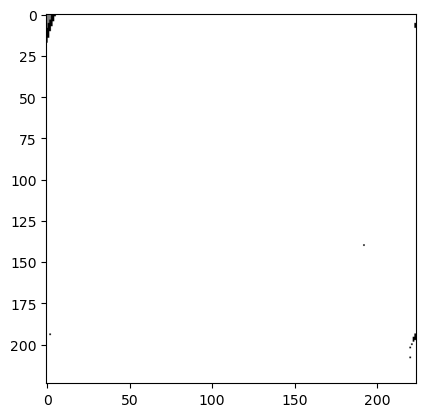

wp 83 level 27.81818181818182
connected_components 1


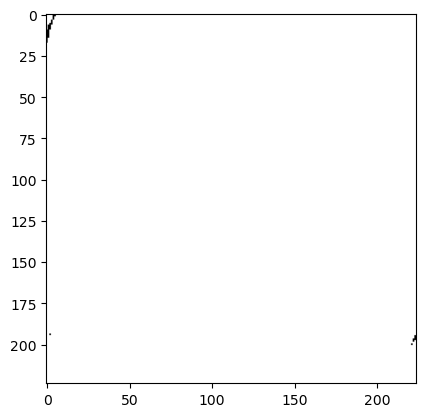

wp 84 level 26.181818181818183
connected_components 1


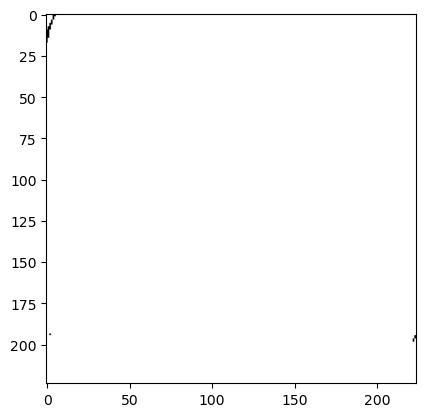

wp 85 level 24.545454545454547
connected_components 1


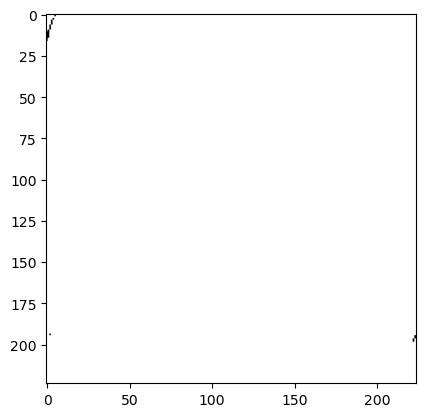

wp 86 level 22.90909090909091
connected_components 1


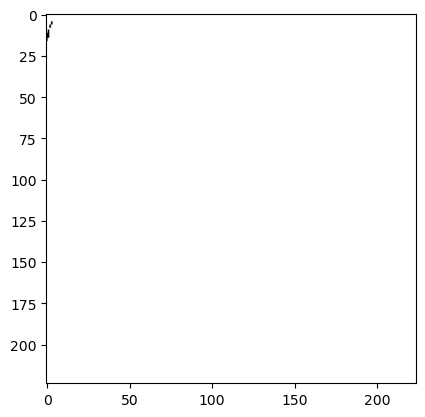

wp 87 level 21.272727272727273
connected_components 1


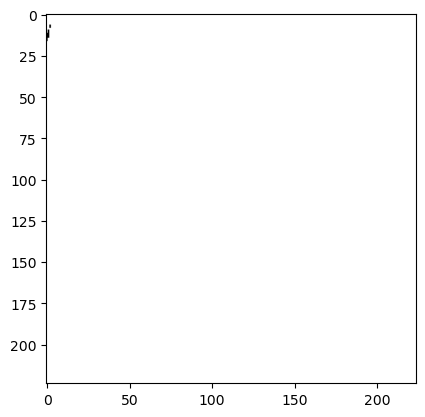

wp 88 level 19.636363636363637
connected_components 1


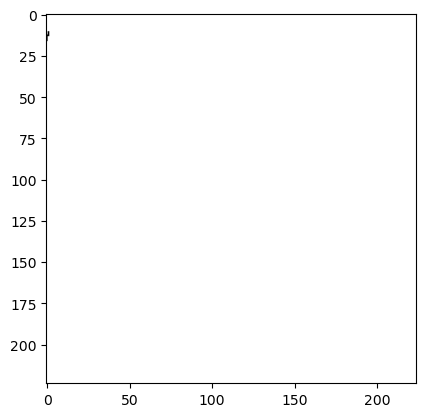

wp 89 level 18.0
connected_components 1


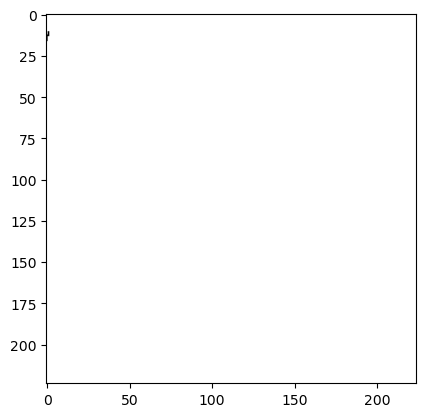

wp 90 level 16.363636363636363
connected_components 1


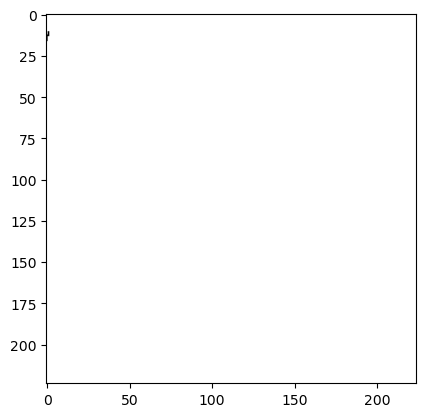

wp 91 level 14.727272727272728
connected_components 1


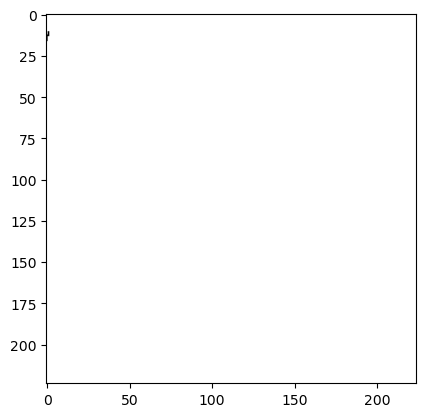

wp 92 level 13.090909090909092
connected_components 1


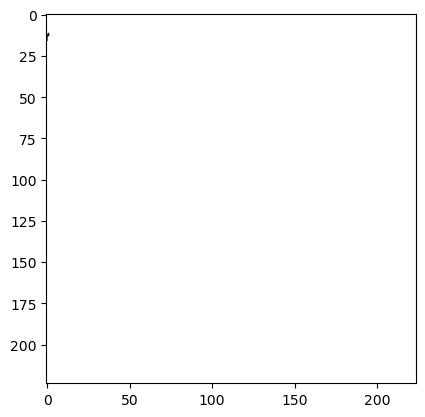

wp 93 level 11.454545454545455
connected_components 1


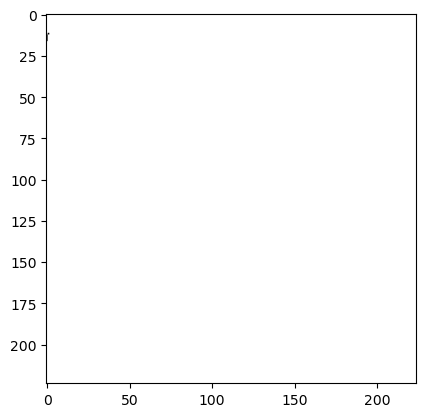

wp 94 level 9.818181818181818
connected_components 1


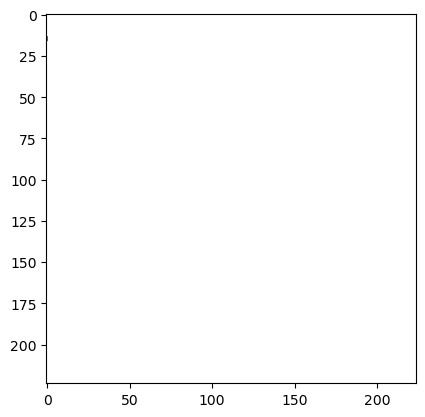

wp 95 level 8.181818181818182
connected_components 1


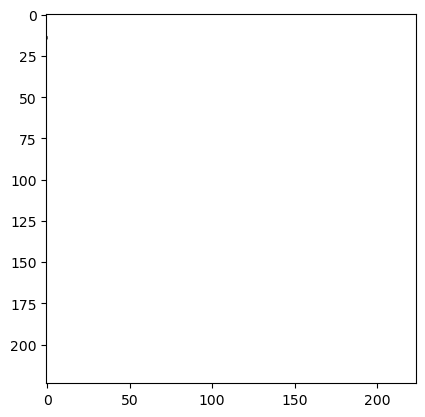

wp 96 level 6.545454545454546
connected_components 1


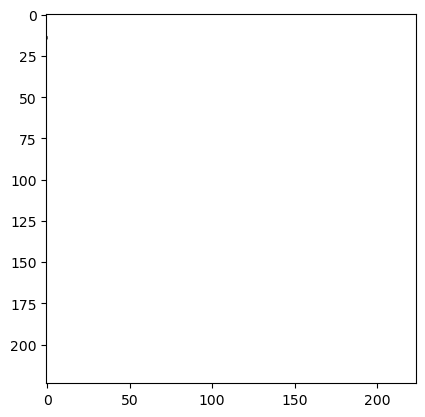

wp 97 level 4.909090909090909
connected_components 1


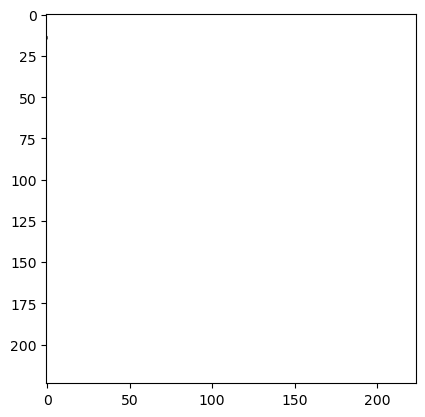

wp 98 level 3.272727272727273
connected_components 1


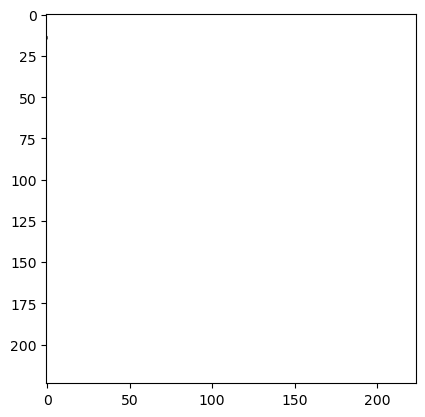

wp 99 level 1.6363636363636365
connected_components 1


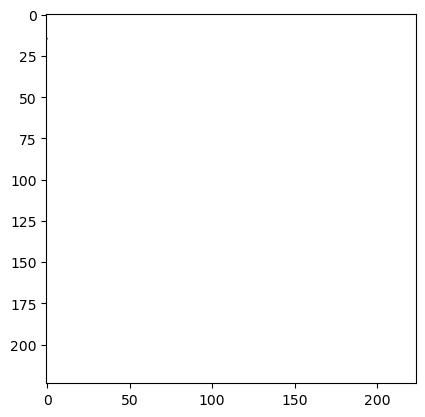

wp 100 level 0.0
connected_components 1


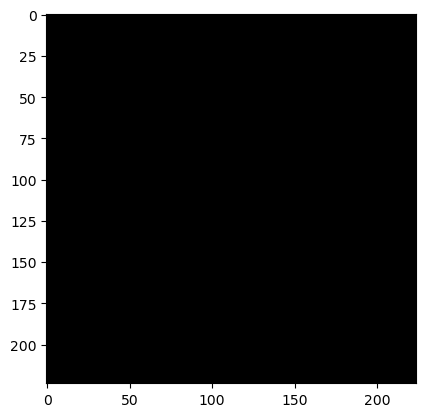

In [478]:
L = np.linspace(np.min(U_train[m]), np.max(U_train[m]), 100)[::-1]
U = U_train[m]
life, barecode, persistence, connected_comp, Per_total, Area_total, euler_total, per, area, euler = function_persistance(U, L, True)

In [479]:
P_tilde = np.zeros(len(L))
for i, per_list in zip(per.keys(), per.values()):
    P_tilde = P_tilde + per[i]/np.sum(area[i])

In [497]:
life
diagram_pondere = np.zeros((1, len(life), 3))
i = 0
for idx in life.keys():
    diagram_pondere[0][i][0] = np.linalg.norm(per[idx])*life[idx][0]
    diagram_pondere[0][i][1] = np.linalg.norm(per[idx])*life[idx][1]
    diagram_pondere[0][i][2] = 0
    i=i+1

In [498]:
persistence_entropy = PersistenceEntropy(normalize=True)

diagram_pondere = [i for i in diagram_pondere if str(i) != 'nan']
# Calculate topological feature matrix
X = persistence_entropy.fit_transform(diagram_pondere)

# Visualise feature matrix
#fig_entropy = plot_point_cloud(X)

In [483]:
X

array([[0.08362208]])